In [16]:
%run web_scraping.ipynb

<thead>
<tr>
<th><strong>S. No.</strong></th>
<th><strong>Name of State / UT</strong></th>
<th><strong>Active Cases*</strong></th>
<th><strong>Cured/Discharged/Migrated*</strong></th>
<th><strong>Deaths**</strong></th>
<th><strong>Total Confirmed cases*</strong></th>
</tr>
</thead>
[<tr>
<th><strong>S. No.</strong></th>
<th><strong>Name of State / UT</strong></th>
<th><strong>Active Cases*</strong></th>
<th><strong>Cured/Discharged/Migrated*</strong></th>
<th><strong>Deaths**</strong></th>
<th><strong>Total Confirmed cases*</strong></th>
</tr>]
<tbody>
<tr>
<td>1</td>
<td>Andaman and Nicobar Islands</td>
<td>0</td>
<td>33</td>
<td>0</td>
<td>33</td>
</tr>
<tr>
<td>2</td>
<td>Andhra Pradesh</td>
<td>1220</td>
<td>2289</td>
<td>60</td>
<td>3569</td>
</tr>
<tr>
<td>3</td>
<td>Arunachal Pradesh</td>
<td>3</td>
<td>1</td>
<td>0</td>
<td>4</td>
</tr>
<tr>
<td>4</td>
<td>Assam</td>
<td>1018</td>
<td>163</td>
<td>4</td>
<td>1185</td>
</tr>
<tr>
<td>5</td>
<td>Bihar</td>
<td>1998</td>
<td>1618<

 Volume in drive C is SSD
 Volume Serial Number is AECD-2471

 Directory of C:\Users\007\Documents\ml\mp

31-05-2020  23:56    <DIR>          .
31-05-2020  23:56    <DIR>          ..
28-05-2020  12:45    <DIR>          .ipynb_checkpoints
28-05-2020  12:21           102,496 chatbot.ipynb
27-05-2020  23:01           418,297 chatbotThroughRasa (1).docx
28-05-2020  10:17            15,767 Chatbot_dataset.csv
31-05-2020  23:24           121,372 compl.csv
31-05-2020  23:56           134,953 complete.csv
17-05-2020  21:36             3,366 complete1.csv
26-05-2020  11:56           526,346 COVID-Dialogue-Dataset-English.txt
27-05-2020  20:58            38,439 dialog_talk_agent.xlsx
29-05-2020  17:16         2,329,454 help.gif
27-05-2020  13:50            49,804 help.png
07-02-2020  14:23               966 Indian_States.dbf
07-02-2020  14:23               143 Indian_States.prj
07-02-2020  14:23         5,759,420 Indian_States.shp
07-02-2020  14:23               388 Indian_States.shx
29-05-2020 

web_scraping.ipynb:31: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
Cured/Discharged/Migrated    2327 non-null int64
Date                         2327 non-null object
Death                        2327 non-null int64
Latitude                     2321 non-null float64
Longitude                    2321 non-null float64
Name of State / UT           2327 non-null object
Total Confirmed cases        2327 non-null int64
Unnamed: 0                   2019 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 145.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 8 columns):
Cured/Discharged/Migrated    2327 non-null int32
Date                         2327 non-null object
Death                        2327 non-null int32
Latitude                     2321 non-null float64
Longitude                    2321 non-null float64
Name of State / UT           2327 non-null object
Total Confirmed cases   

In [17]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [18]:
#some imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [19]:
#Active cases column
complete_data['Active']=complete_data['Total Confirmed cases']-complete_data['Death']-complete_data['Cured/Discharged/Migrated']

In [20]:
ab=complete_data[['Date','Total Confirmed cases','Death','Cured/Discharged/Migrated','Active']].groupby(by=['Date']).sum()
ab.iplot(kind='line',xTitle='Date',yTitle='Count',fill=True)

In [21]:
from datetime import date
latest_data=complete_data[complete_data['Date'].apply( lambda x:x==date.today())]

In [22]:
latest_data[0:5]

,Cured/Discharged/Migrated,Date,Death,Latitude,Longitude,Name of State / UT,Total Confirmed cases,Unnamed: 0,Active
2292,33,2020-05-31,0,11.7401,92.6586,Andaman and Nicobar Islands,33,NaN,0
2293,2289,2020-05-31,60,15.9129,79.7400,Andhra Pradesh,3569,NaN,1220
2294,1,2020-05-31,0,28.2180,94.7278,Arunachal Pradesh,4,NaN,3
2295,163,2020-05-31,4,26.2006,92.9376,Assam,1185,NaN,1018
2296,1618,2020-05-31,20,25.0961,85.3131,Bihar,3636,NaN,1998


In [23]:
#state wise count in barplot
latest_data.iplot(kind='bar',x='Name of State / UT',y='Total Confirmed cases',colors='green',xTitle='States/UT',yTitle='Count',title='State wise count')

In [24]:
import plotly.graph_objects as go
plt.figure(figsize=(10,10))
dz=[]
for x in ['Active','Death','Cured/Discharged/Migrated']:
    dz.append(latest_data[x].sum())

fig = go.Figure(data=[go.Pie(labels=['Active','Death','Cured/Discharged/Migrated'], values=dz, hole=.5,title='Out of total confirmed cases')])
fig.show()

<Figure size 720x720 with 0 Axes>

In [27]:
import geopandas as gpd
map_data = gpd.read_file('Indian_States.shp')
#map_data.rename(columns = {‘st_nm’:’States/UT’}, inplace = True)
map_data.head(1)

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."


In [28]:
df_bs['Name of State / UT'].head(37)

0     Andaman and Nicobar Islands
1                  Andhra Pradesh
2               Arunachal Pradesh
3                     Assam      
4                     Bihar      
5                     Chandigarh 
6                    Chhattisgarh
7              Dadar Nagar Haveli
8                     Delhi      
9                     Goa        
10                    Gujarat    
11                    Haryana    
12               Himachal Pradesh
13              Jammu and Kashmir
14                    Jharkhand  
15                    Karnataka  
16                    Kerala     
17                    Ladakh     
18                 Madhya Pradesh
19                    Maharashtra
20                    Manipur    
21                    Meghalaya  
22                    Mizoram    
23                    Nagaland   
24                    Odisha     
25                    Puducherry 
26                    Punjab     
27                    Rajasthan  
28                    Sikkim     
29            

In [29]:
map_data['st_nm'] = map_data['st_nm'].str.replace('&','and')
map_data['st_nm'].replace('Arunanchal Pradesh',
                              'Arunachal Pradesh', inplace = True)
map_data['st_nm'].replace('Telangana', 
                              'Telengana', inplace = True)
map_data['st_nm'].replace('NCT of Delhi', 
                              'Delhi', inplace = True)
map_data['st_nm'].replace('Andaman and Nicobar Island', 
                              'Andaman and Nicobar Islands', 
                               inplace = True)
map_data['st_nm'].replace('Dadara and Nagar Havelli', 
                              'Dadar Nagar Haveli', 
                               inplace = True)
map_data['Name of State / UT']=map_data['st_nm']
map_data.drop(['st_nm'],axis=1,inplace=True)
map_data.head(2)

,geometry,Name of State / UT
0,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",Andaman and Nicobar Islands
1,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",Arunachal Pradesh


In [30]:
merged_data = pd.merge(map_data, latest_data, 
                       how = 'left', on = 'Name of State / UT')
#merged_data.fillna(0, inplace = True)
merged_data.drop('Unnamed: 0', axis = 1, inplace = True)
merged_data.dropna()

,geometry,Name of State / UT,Cured/Discharged/Migrated,Date,Death,Latitude,Longitude,Total Confirmed cases,Active
0,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",Andaman and Nicobar Islands,33.0,2020-05-31,0.0,11.7401,92.6586,33.0,0.0
1,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",Arunachal Pradesh,1.0,2020-05-31,0.0,28.2180,94.7278,4.0,3.0
2,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",Assam,163.0,2020-05-31,4.0,26.2006,92.9376,1185.0,1018.0
3,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",Bihar,1618.0,2020-05-31,20.0,25.0961,85.3131,3636.0,1998.0
4,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",Chandigarh,189.0,2020-05-31,4.0,30.7333,76.7794,289.0,96.0
5,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",Chhattisgarh,102.0,2020-05-31,1.0,21.2787,81.8661,447.0,344.0
6,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",Dadar Nagar Haveli,0.0,2020-05-31,0.0,20.1809,73.0169,2.0,2.0
8,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",Goa,41.0,2020-05-31,0.0,15.2993,74.1240,70.0,29.0
9,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",Gujarat,9230.0,2020-05-31,1007.0,22.2587,71.1924,16343.0,6106.0
10,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",Haryana,971.0,2020-05-31,20.0,29.0588,76.0856,1923.0,932.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning:

invalid value encountered in less



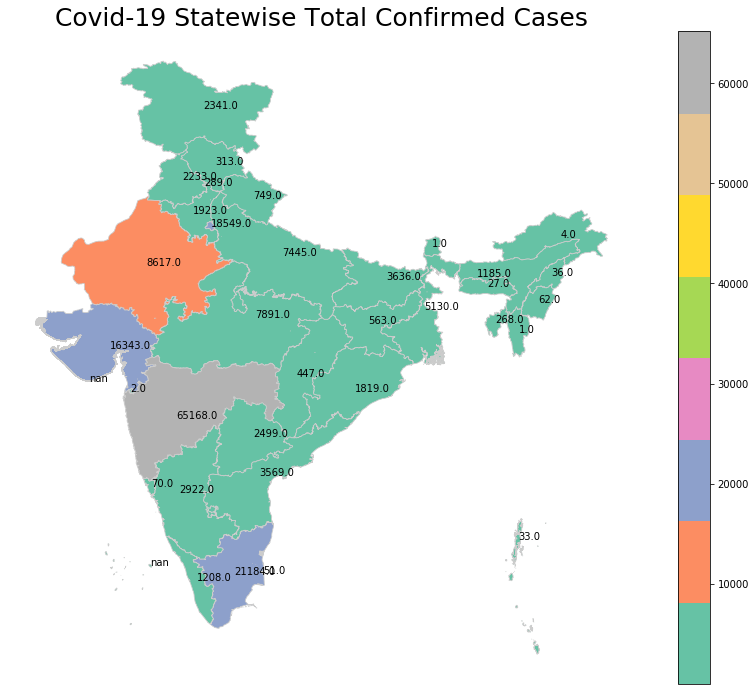

In [33]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Total Confirmed Cases', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Total Confirmed cases', cmap='Set2', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
merged_data['coords'] = merged_data['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_data['coords'] = [coords[0] for coords in merged_data['coords']]
for idx, row in merged_data.iterrows():
    plt.annotate(xy=row['coords'],s=row['Total Confirmed cases'])

plt.show()